# **Load Libraries**

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler,LabelEncoder # Encoding categorical variables
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
# Import data from Drive
path='../data/raw/churn_dataset.csv'

# **Data Representation**


In [38]:
# Load the dataset
df = pd.read_csv(path)

In [39]:
# Display the first few rows of the DataFrame
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Data Exploration**

**Understand Data Types and Structure**

In [40]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [41]:
# Display basic statistics of numerical features
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [42]:
# Display the shape of the dataset (nb rows and columns)
df.shape

(10000, 14)

# **Data Preparation**


**1. Data cleaning: Handling missing values and duplicates**

**Check missing value**

In [43]:
df.isnull().sum() # check missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Check duplicated values**

In [44]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [45]:
# Drop unnecessary columns
# 'RowNumber', 'CustomerId', and 'Surname' are irrelevant for prediction
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

**2. Encoding categorical variables**

In [46]:
# Instantiate the LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df= pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [47]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


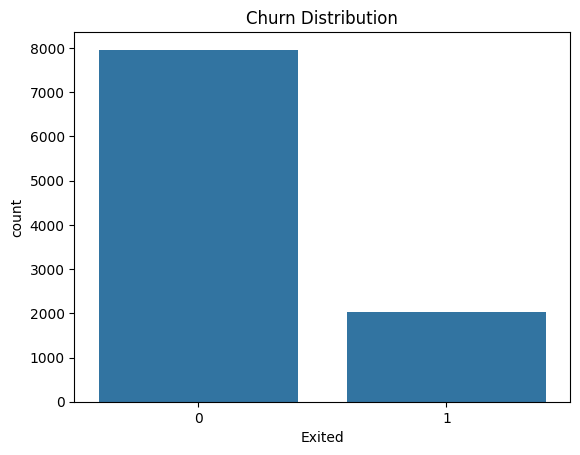

In [48]:
# Visualize the class distribution (target variable)
sns.countplot(x='Exited', data=df)
plt.title("Churn Distribution")
plt.show()

**Gender and Exited**

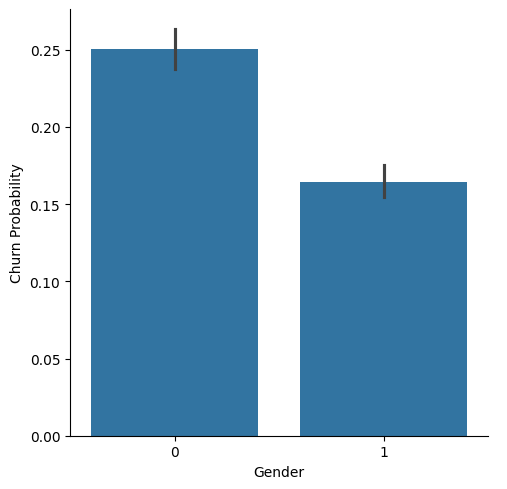

In [49]:
g= sns.catplot(x = "Gender", y = "Exited", data = df, kind = "bar", height = 5)
g.set_ylabels("Churn Probability")
plt.show()

**Age versus Exited**

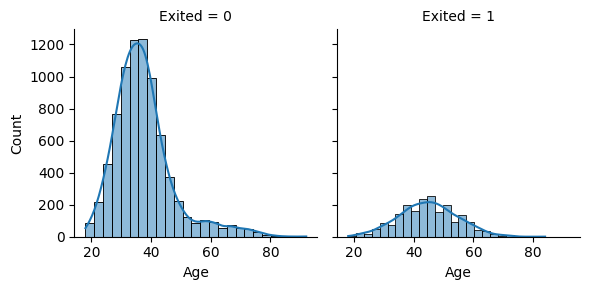

In [50]:
g = sns.FacetGrid(df, col="Exited")
g.map(sns.histplot, "Age", bins=25, kde=True)  # kde=True adds a density curve
plt.show()

# **Age Distribution by Churn**

**Visualize the distribution of customer ages based on the target variable Exited.**

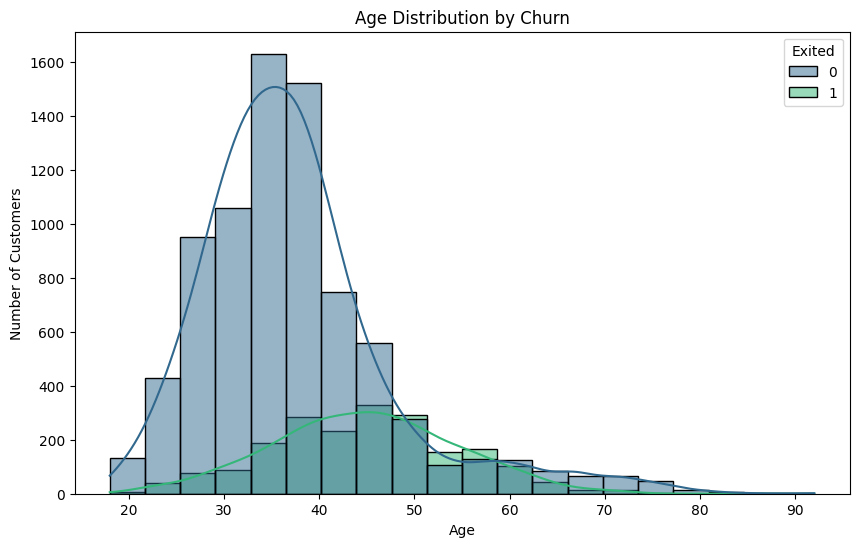

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue="Exited", kde=True, bins=20, palette="viridis")
plt.title("Age Distribution by Churn")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()


# **Gender** Distribution by Churn

** Show the distribution of churn rates across genders.**

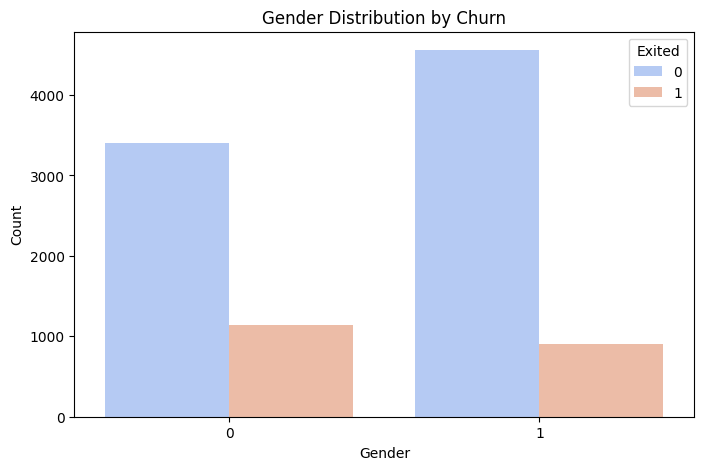

In [52]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Gender", hue="Exited", palette="coolwarm")
plt.title("Gender Distribution by Churn")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()



**Feature Selection**

In [53]:
from re import X
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Spain', 'Geography_Germany']

X = df[features]
y = df['Exited']

**Split data into testing and training**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling**

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
X_train[:5], X_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57638802,
         -0.57946723],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 , -0.57638802,
          1.72572313],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688,  1.73494238,
         -0.57946723],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57638802,
         -0.57946723],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57638802,
         -0.57946723]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
          0.80843615, -1.54035103, -1.02583358, -1.01960511, -0.57638

# **Random Forest**

In [57]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
y_pred = model.predict(X_test)

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score (Random Forest):", accuracy)

Confusion Matrix:
[[1552   55]
 [ 206  187]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000


Accuracy Score (Random Forest): 0.8695


 **Feature Importance**

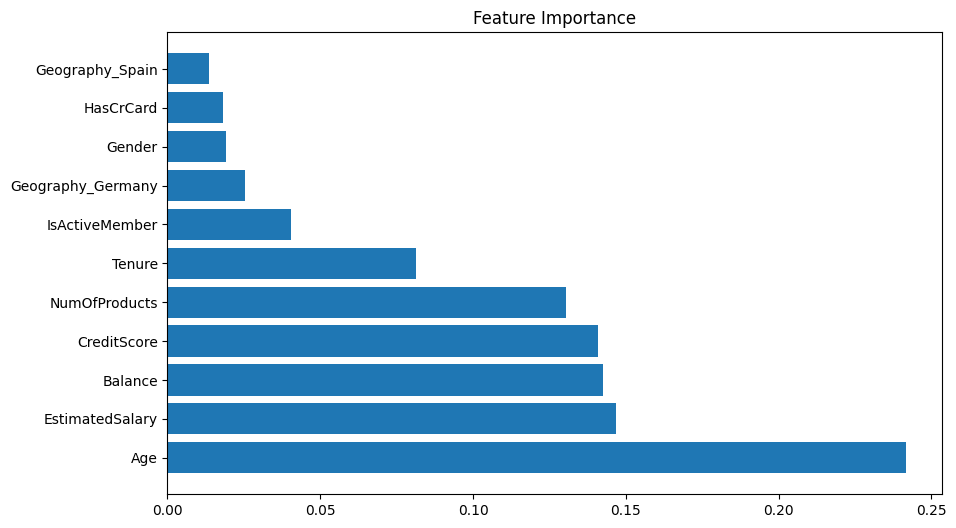

In [60]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

# **Logistic Regression**

In [61]:
from sklearn.linear_model import LogisticRegression

# Build and train the Logistic Regression model

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evalute the model
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print("\nClassification Report (Logistic Regression):")
print(class_report_log_reg)
accurancy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy Score (Logistic Regression):", accurancy_log_reg)

Confusion Matrix (Logistic Regression):
[[1543   64]
 [ 314   79]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy Score (Logistic Regression): 0.811


# **Support Vector Classifier (SVC)**


In [62]:
from sklearn.svm import SVC

# Build and train the SVC model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions

y_pred_svm = svm_model.predict(X_test)

# Evaluate the model

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVC) : ")
print(conf_matrix_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
print("\nClassification Report (SVC):")
print(class_report_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy Score (SVC):", accuracy_svm)

Confusion Matrix (SVC) : 
[[1562   45]
 [ 243  150]]

Classification Report (SVC):
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy Score (SVC): 0.856


# **K-Nearest Neighbors (KNN)**


In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Build and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
print("\nClassification Report (KNN):")
print(class_report_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy Score (KNN):", accuracy_knn)

Confusion Matrix (KNN):
[[1514   93]
 [ 247  146]]

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000

Accuracy Score (KNN): 0.83


# **Gradient Boosting Classifier**

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

# Build and train the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix (Gradient Boosting):")
print(conf_matrix_gb)
class_report_gb = classification_report(y_test, y_pred_gb)
print("\nClassification Report (Gradient Boosting):")
print(class_report_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy Score (Gradient Boosting):", accuracy_gb)

Confusion Matrix (Gradient Boosting):
[[1543   64]
 [ 201  192]]

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Accuracy Score (Gradient Boosting): 0.8675


# **Feature Engineering**

In [65]:
df = pd.read_csv(path)

# Binary feature for Balance
df['BalanceZero'] = (df['Balance'] == 0).astype(int)
# Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 75, 85, float('inf')],
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '85+'])

#Balance to Salary Ratio

df['BalanceToSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

# Interaction between NumOfProducts and IsActiveMember
df['ProductUsage'] = df['NumOfProducts'] * df['IsActiveMember']

# Tenure grouping
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0, 2, 5, 7, 10, float('inf')],
                           labels=['0-2', '3-5', '6-7', '8-10', '10+'])



In [66]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df= pd.get_dummies(df, columns=['Geography'], drop_first=True)
# Creating columns for the interaction between 'Gender' and specific countries

df['Male_Germany'] = df['Gender'] * df['Geography_Germany']
df['Male_Spain'] = df['Gender'] * df['Geography_Spain']

In [67]:
df = pd.get_dummies(df, columns=['AgeGroup','TenureGroup'], drop_first=True)

In [68]:
# Define the list of features
features = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
    'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
    'Geography_Spain', 'BalanceZero', 'BalanceToSalaryRatio', 'ProductUsage',
    'Male_Germany', 'Male_Spain'
] + [col for col in df.columns if 'AgeGroup' in col or 'TenureGroup' in col]

# Define X and y
X = df[features]
y = df['Exited']

In [69]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score (Random Forest):", accuracy)


Confusion Matrix:
[[1549   58]
 [ 205  188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000


Accuracy Score (Random Forest): 0.8685
